# Final Project Submission

Please fill out:
* Student name: Martin Schilling


<img src="figures/Screenshot 2020-03-05 17.53.13.png">

# 1) Business Understanding

### Introduction
My friend lets call him 'Bendix' is an extraordinary good Freelance Data Scientist. 
He is currently looking for a partner to found a Data Science Company in King County, WA.
Since there is a lot of money to be made there. He wants to help rich people to accomplish private goals with data.
He is very smart and has already figured out which house would be perfect to start his business:
It must be cheap, near his potentiell rich clients, should have a bathroom...thats about it

Now he wants to test me (his potential) partner, if I can come up with recommendations.

### Questions to be asked
* What does he have to do to find a relatively cheap property near his clients?
* How can he improve his chances to find a place?
* Must he be willing to renovate it? How small can you go?
* What determines the price? 
* He wants to sell a prediction model to his clients. How good is your model commpared to his perfect one? 
* How good is the model for predictions? What is missing?
* How much percent of the houses have waterfront? In what zipcode do the rich live?

# 2) Data Mining

## Importing the relevant libraries

In [614]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics# 1) Business Understanding
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

## Loading the raw data

In [704]:
raw_data = pd.read_csv('King_County_House_prices_dataset.csv')
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


# 3) Data Cleaning

## Preprocessing

### Exploring the descriptive statistics of the variables

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
raw_data.describe(include= 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,...,21597.00,21597.00,21597,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
unique,nan,372,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,304,nan,nan,nan,nan,nan,nan,nan
top,nan,6/23/2014,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan
freq,nan,142,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,12826,nan,nan,nan,nan,nan,nan,nan
mean,4580474287.77,NaN,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,...,7.66,1788.60,NaN,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,NaN,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,...,1.17,827.76,NaN,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,NaN,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,...,3.00,370.00,NaN,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,NaN,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,NaN,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,NaN,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,NaN,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,NaN,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,...,8.00,2210.00,NaN,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00


maybe we can already draw conclusions which variables might not be usefull

## Determining the variables of interest

In [28]:
data = raw_data.drop(['id'], axis=1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
unique,372,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,304,nan,nan,nan,nan,nan,nan,nan
top,6/23/2014,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan
freq,142,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12826,nan,nan,nan,nan,nan,nan,nan
mean,NaN,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,NaN,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,NaN,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,NaN,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,NaN,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,NaN,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,NaN,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,NaN,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,NaN,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,NaN,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,NaN,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,NaN,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00


## Dealing with missing values

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
total

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
date                0
dtype: int64

In [6]:
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [7]:
# Rule of thumb: if you are removing <5% of the observations, you are free to just remove all the have MV
# unfortunately that is not the case: 17.78%
data.isnull().sum()['yr_renovated'] / data.shape[0] * 100

17.78950780200954

#### Question: Is it better to remove all Null Values or the Column yr_renovated?

In [311]:
# 1. Try removing all missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
3,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,6/27/2014,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819


In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_no_mv.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15762,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00
unique,369,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,283,nan,nan,nan,nan,nan,nan,nan
top,6/25/2014,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan
freq,103,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9362,nan,nan,nan,nan,nan,nan,nan
mean,NaN,541317.18,3.38,2.12,2084.51,15280.82,1.50,0.01,0.23,3.41,7.66,1792.78,NaN,1971.11,82.44,98077.56,47.56,-122.21,1990.22,12900.42
std,NaN,372225.84,0.94,0.77,918.62,41822.88,0.54,0.09,0.76,0.65,1.17,828.40,NaN,29.34,397.21,53.41,0.14,0.14,684.14,27977.23
min,NaN,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,NaN,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,NaN,321000.00,3.00,1.75,1430.00,5048.50,1.00,0.00,0.00,3.00,7.00,1200.00,NaN,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,NaN,450000.00,3.00,2.25,1920.00,7602.00,1.50,0.00,0.00,3.00,7.00,1570.00,NaN,1975.00,0.00,98065.00,47.57,-122.23,1846.00,7620.00
75%,NaN,644875.00,4.00,2.50,2550.00,10720.00,2.00,0.00,0.00,4.00,8.00,2220.00,NaN,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10107.50


# 4) Data Exploration

## Exploring the PDFs

In [10]:
data_no_mv.price.describe()

count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64

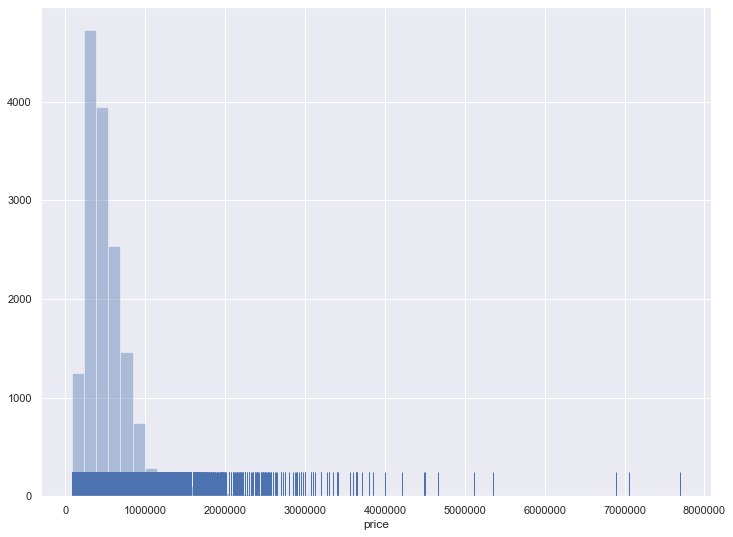

In [293]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_no_mv['price'], kde=False, rug=True);
plt.savefig('figures/price.png')

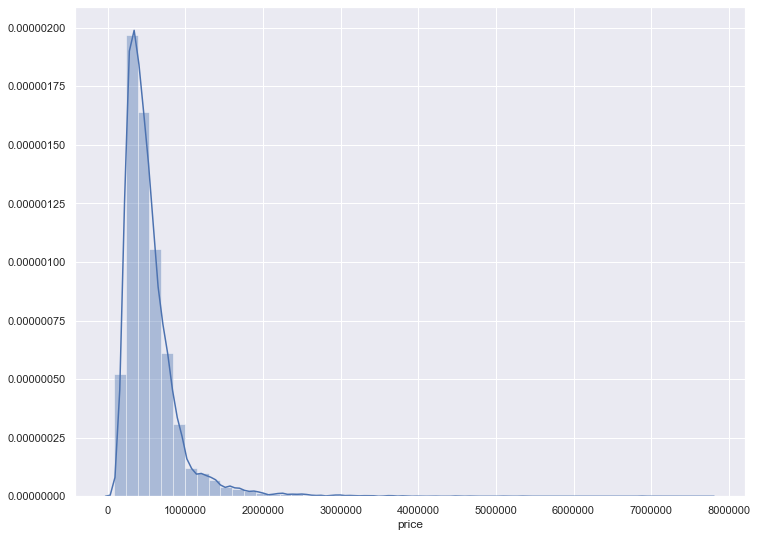

In [294]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_no_mv['price']);
plt.savefig('figures/price_dist.png')

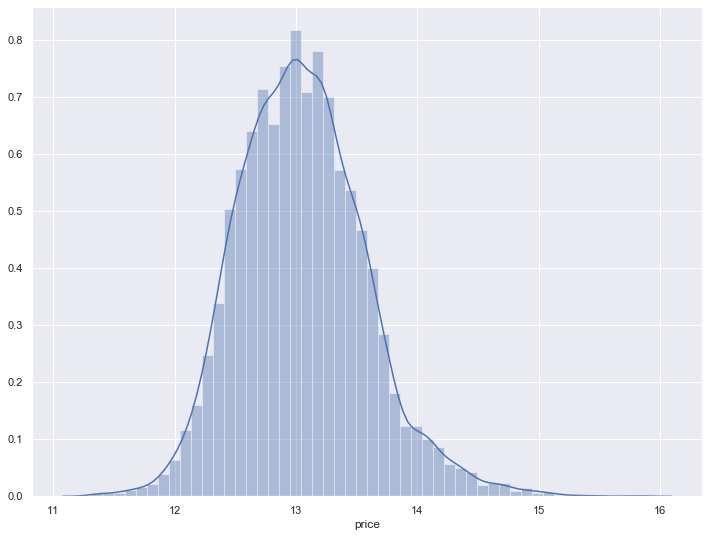

In [15]:
data_no_mv_log_price = np.log(data_no_mv.price)
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_no_mv_log_price);

### What are the continuous variables and what are the categorical variabels?

In [37]:
continuous_var = list(data_no_mv.select_dtypes(
                        ['int64','float64','bool']).columns.values)
continuous_var.remove('view')
continuous_v# 3) Data Cleaningar.remove('grade')
categorical_var=['date','sqft_basement','view','grade']
categorical_var.remove('date')
categorical_var.remove('sqft_basement')
print('Continiuous', continuous_var)
print('Categorical', categorical_var)

# Frage ist ob man view und grade mitaufnimmt oder nicht

Continiuous ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical ['view', 'grade']


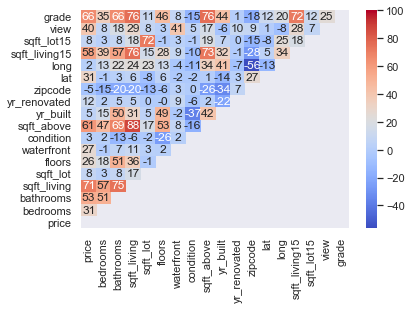

In [295]:
data_dum=pd.get_dummies(data_no_mv[continuous_var+categorical_var].copy())
mask = np.triu(data_dum.corr())
ax = sns.heatmap(round(data_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,18))
data_dum.shape
plt.savefig('figures/heatmap.png')

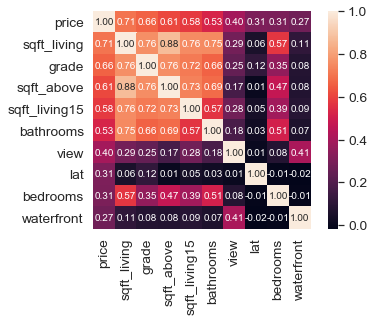

<Figure size 432x288 with 0 Axes>

In [296]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data_dum[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('figures/heatmeap_strongcorr.png')

I will remove certain features from the Dataset even though there is a strong relationship with price. Since there is a strong relationship between sqft_above and sqft_living i will not further explore sqft_above. Morevover since the definition of view is unclear, i will also disregard this variable. 

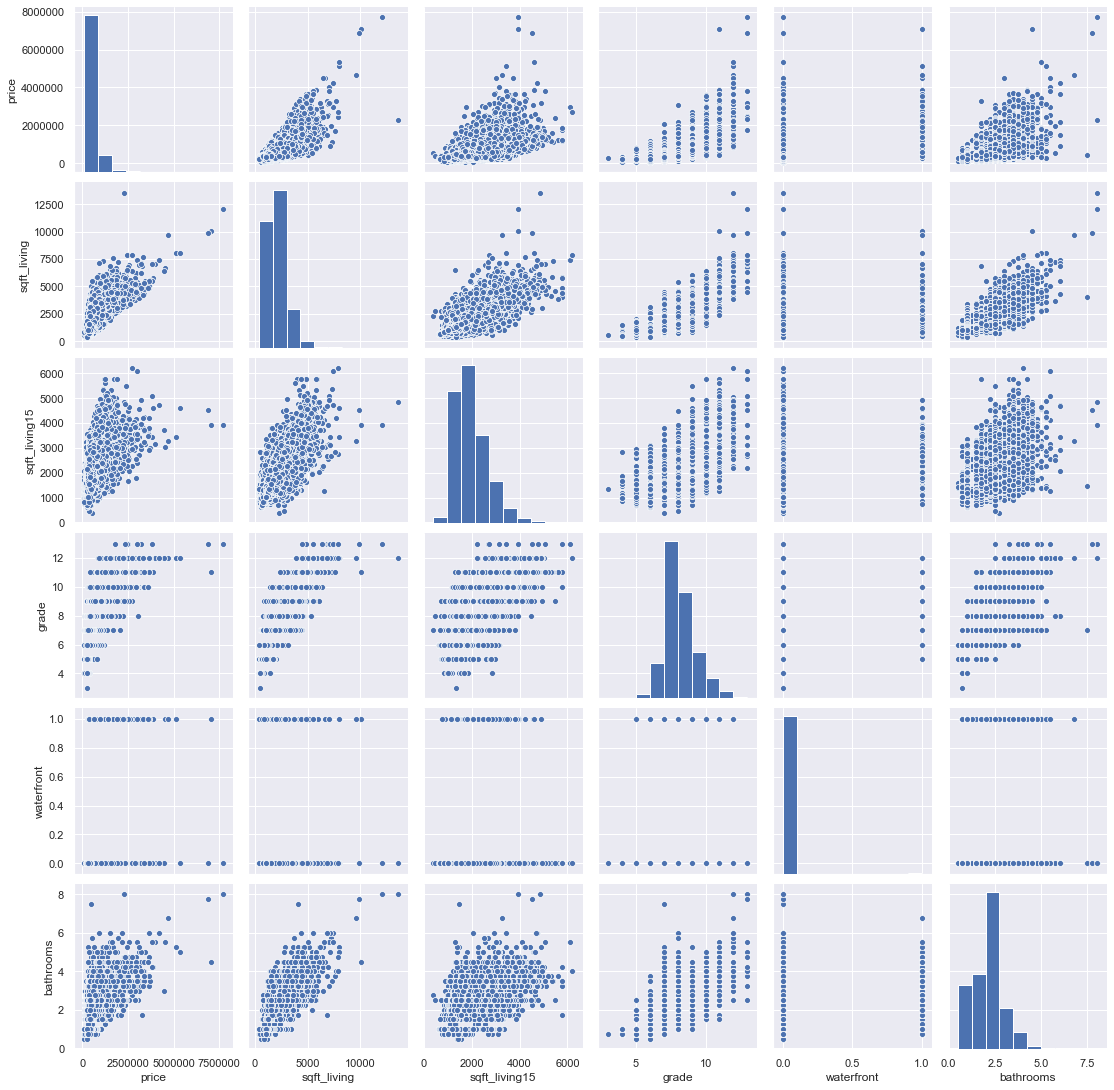

<Figure size 432x288 with 0 Axes>

In [358]:
sns.set()
cols = ['price', 'sqft_living','sqft_living15', 'grade','waterfront', 'bathrooms']
sns.pairplot(data_no_mv[cols], size = 2.5)
plt.show();
plt.savefig('figures/scatter_matrix.png')

# 5) Feature Engineering

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
['view', 'grade']


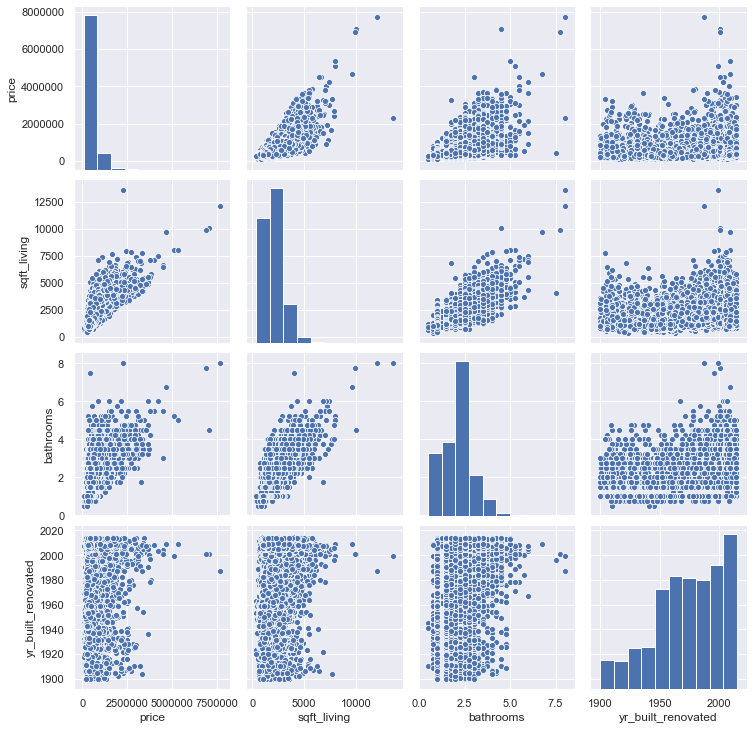

<Figure size 432x288 with 0 Axes>

In [359]:
#Wäre auch eine Möglichkeit auf die Suche zu gehen?
#Muss erst ein Feature Scaling stattfinden

#oder wir machen Feature Selection F-regression

# I want to creat a new variable that combines the yr_built and yr_renovated column
# I want to include this column as well as zip-code in my model to improve the predictability





print(continuous_var)
print(categorical_var)


#list2 = [i for i in ] 

#data_year = data_no_mv[['yr_built', 'yr_renovated']]
#data_year['yr_built_renovated']= [i for i in data_year.yr_built]

data_no_mv['yr_built_renovated'] = [int(data_year.yr_renovated[i]) if data_year.yr_renovated[i] != 0 else int(data_year.yr_built[i]) for i in data_year.index]

data_no_mv.head()

#data_year.yr_renovated.index

#data_year.index

#[f(x) if condition else g(x) for x in sequence]

sns.set()
cols = ['price','sqft_living','bathrooms','yr_built_renovated']
sns.pairplot(data_no_mv[cols], size = 2.5)
plt.show();
plt.savefig('figures/scatter_matrix1.png')

In [ ]:
# es scheint einen zusammenhang zu geben bzgl. yr_built_renovated sowohl mit sqft_living als auch mit anzahl der bathrooms
# falls ich also eine Familie bin die ein Haus sucht, sollte ich vielleicht darauf achten dass das haus neuer ist, und in kauf nehmen, dass ich weiter weg wohnt
# hier lohnt es sich vielleicht noch Grafiken zu machen, darüber hinaus sollte man überprüfen, wie viele überhaupt eine Angabge zur Renovierung gemacht haben

In [595]:
from sklearn.feature_selection import f_regression

cols = ['sqft_living','bathrooms','yr_built_renovated', 'grade','zipcode', 'waterfront' ]

x = data_no_mv[cols]
y = data_no_mv['price']

f_regression(x,y)

(array([15678.46162003,  6033.21458942,   159.26713268, 12437.75662722,
           38.71447989,  1281.37548451]),
 array([0.00000000e+000, 0.00000000e+000, 2.45207045e-036, 0.00000000e+000,
        5.02949892e-010, 7.09712984e-270]))

In [596]:
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0., 0., 0., 0., 0., 0.])

## Dealing with outliers

In [71]:
#plt.figure(figsize=(6,8))
#sns.boxplot(x=data_no_mv['floors'], y=data_no_mv['price'])
#plt.title('Statistical Distribution of Floors versus Price')
#plt.show();

Get out, liers.
For accurate predictions, outliers must be dealt with. Remember how skewed our price data was? Take a look at this box plot, examining the relationship of the number of floors versus the home price.

Analysis of the data within the normal range is nearly impossible to interpret because of the price outliers. The grey diamonds are indicative of datapoints that deviate by three times the standard deviation in normally distributed data. If following the three sigma rule, this only accounts for .3% of data, which seems negligible but can have disastrous effects on our model. Let’s take those outliers out. We’ll use a combination of scipy’s zscore() and numpy’s abs() methods to identify and remove the outliers in price.

In [69]:
#from scipy import stats
#data_new = data_no_mv[(np.abs(stats.zscore(data_no_mv.price)) < 3)]

In [70]:
#plt.figure(figsize=(6,8))
#sns.boxplot( x=data_new['floors'], y=data_new['price'] )
#plt.title('Statistical Distribution of Floors versus Price')
#plt.show();

In [361]:
q = data_no_mv['price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['price']<q]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_1.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_renovated
count,15604,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,...,15604.00,15604,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00,15604.00
unique,369,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,275,nan,nan,nan,nan,nan,nan,nan,nan
top,6/25/2014,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan
freq,102,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,9319,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,518726.69,3.37,2.10,2054.40,15169.75,1.49,0.01,0.21,3.41,...,1769.76,NaN,1971.13,80.46,98077.65,47.56,-122.21,1975.35,12829.23,1973.41
std,NaN,284873.75,0.93,0.74,857.89,41313.27,0.54,0.07,0.72,0.65,...,788.85,NaN,29.25,392.61,53.38,0.14,0.14,667.09,27855.69,28.74
min,NaN,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,370.00,NaN,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00,1900.00
25%,NaN,320000.00,3.00,1.75,1420.00,5030.00,1.00,0.00,0.00,3.00,...,1190.00,NaN,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,1954.00
50%,NaN,450000.00,3.00,2.25,1910.00,7566.00,1.50,0.00,0.00,3.00,...,1560.00,NaN,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7600.00,1977.00
75%,NaN,635000.00,4.00,2.50,2530.00,10583.25,2.00,0.00,0.00,4.00,...,2190.00,NaN,1997.00,0.00,98117.00,47.68,-122.12,2350.00,10052.25,1999.00


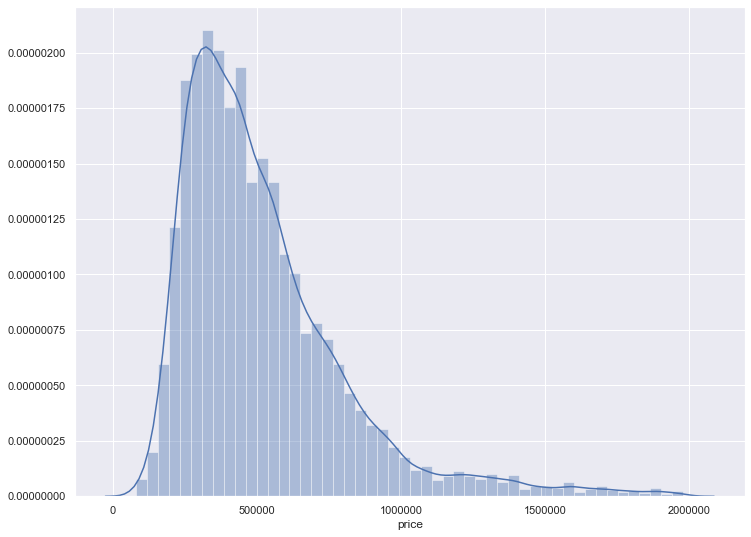

In [370]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_1['price']);
plt.savefig('figures/price_dist_clean.png')

In [51]:
#q = data_1['sqft_above'].quantile(0.99)
#data_2 = data_1[data_1['sqft_above']<q]
#f, ax = plt.subplots(figsize=(12, 9))
#sns.distplot(data_2['sqft_above']);

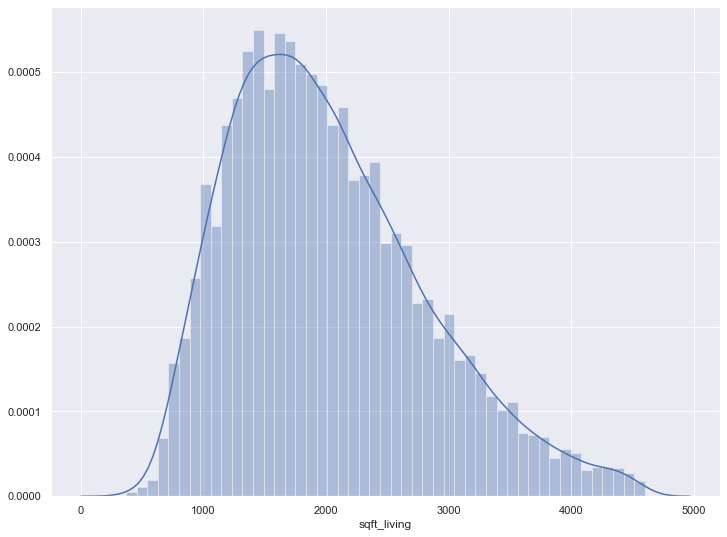

In [568]:
q = data_1['sqft_living'].quantile(0.99)
data_2 = data_1[data_1['sqft_living']<q]
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_2['sqft_living']);
plt.savefig('figures/sqft_clean.png')

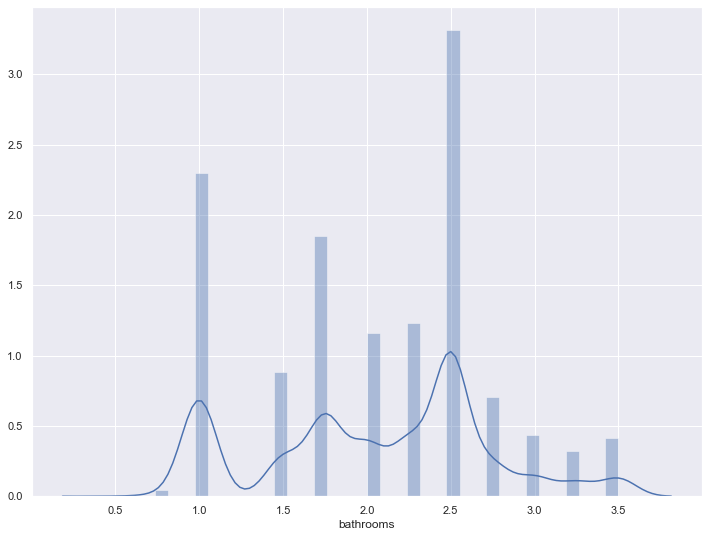

In [372]:
q = data_2['bathrooms'].quantile(0.99)
data_3 = data_2[data_2['bathrooms']<q]
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_3['bathrooms']);
plt.savefig('figures/bathrooms_clean.png')

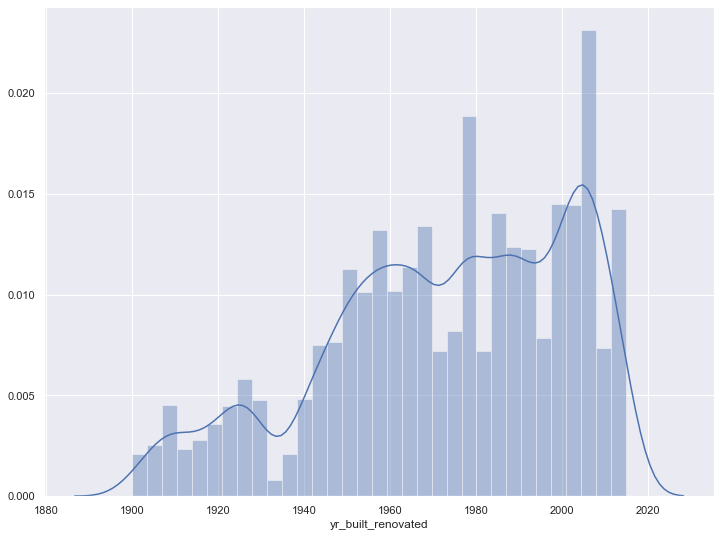

In [369]:
data_3['yr_built_renovated']
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data_3['yr_built_renovated']);
plt.savefig('figures/yr_built_renovated_clean.png')

In [569]:
# to understand my business case, I want to understand what influence the location (long and lat) have on my data frame
cols_with_lat_long = ['price', 'sqft_living','grade','waterfront', 'bathrooms', 'long', 'lat']
# this line helps us to determine with what data we want to continue working and resets the index of our DataFrame
#data_cleaned = data_3.drop([i for i in data_3.columns if i not in cols], axis=1).reset_index(drop=True)
data_cleaned = data_3.drop([i for i in data_3.columns if i not in cols_with_lat_long], axis=1).reset_index(drop=True)

# what possible outcomes are available for waterfront
print(set(data_cleaned.waterfront))

data_cleaned.describe()

{0.0, 1.0}


,price,bathrooms,sqft_living,waterfront,grade,lat,long
count,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00
mean,503102.95,2.05,1997.48,0.00,7.58,47.56,-122.21
std,262726.21,0.68,773.07,0.07,1.07,0.14,0.14
min,82000.00,0.50,370.00,0.00,3.00,47.16,-122.52
25%,318000.00,1.50,1410.00,0.00,7.00,47.46,-122.33
50%,443000.00,2.25,1880.00,0.00,7.00,47.57,-122.23
75%,620000.00,2.50,2480.00,0.00,8.00,47.68,-122.12
max,1980000.00,3.50,4600.00,1.00,12.00,47.78,-121.31


In [399]:
cols_new = ['price', 'sqft_living', 'grade','waterfront', 'bathrooms', 'yr_built_renovated', 'zipcode']
data_cleaned_new = data_3.drop([i for i in data_3.columns if i not in cols_new], axis=1).reset_index(drop=True)
data_cleaned_new.describe()

,price,bathrooms,sqft_living,waterfront,grade,zipcode,yr_built_renovated
count,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00
mean,503102.95,2.05,1997.48,0.00,7.58,98077.99,1972.91
std,262726.21,0.68,773.07,0.07,1.07,53.41,28.74
min,82000.00,0.50,370.00,0.00,3.00,98001.00,1900.00
25%,318000.00,1.50,1410.00,0.00,7.00,98033.00,1954.00
50%,443000.00,2.25,1880.00,0.00,7.00,98065.00,1977.00
75%,620000.00,2.50,2480.00,0.00,8.00,98118.00,1998.00
max,1980000.00,3.50,4600.00,1.00,12.00,98199.00,2015.00


## Checking the OLS assumptions

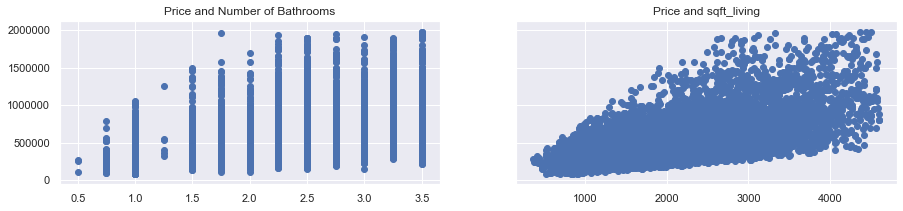

<Figure size 432x288 with 0 Axes>

In [570]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bathrooms'], data_cleaned['price'])
ax1.set_title('Price and Number of Bathrooms')
ax2.scatter(data_cleaned['sqft_living'], data_cleaned['price'])
ax2.set_title('Price and sqft_living')

plt.show()
plt.savefig('figures/relation_scater_clean.png')

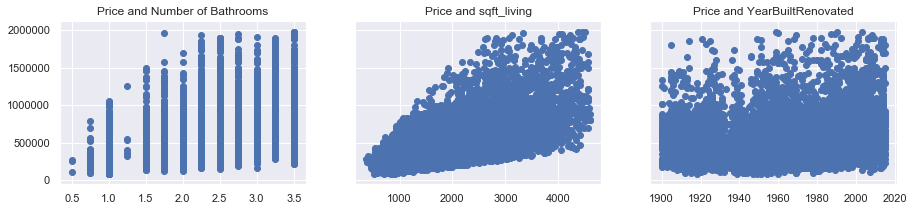

<Figure size 432x288 with 0 Axes>

In [571]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned_new['bathrooms'], data_cleaned_new['price'])
ax1.set_title('Price and Number of Bathrooms')
ax2.scatter(data_cleaned_new['sqft_living'], data_cleaned_new['price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(data_cleaned_new['yr_built_renovated'], data_cleaned_new['price'])
ax3.set_title('Price and YearBuiltRenovated')

plt.show()
plt.savefig('figures/relation_scater_clean_new.png')

## Relaxing the assumptions

In [572]:
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price
data_cleaned_new['log_price'] = log_price
data_cleaned_new.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode,yr_built_renovated,log_price
0,538000.00,2.25,2570,0.00,7,98125,1991,13.20
1,604000.00,3.00,1960,0.00,7,98136,1965,13.31
2,510000.00,2.00,1680,0.00,8,98074,1987,13.14
3,257500.00,2.25,1715,0.00,7,98003,1995,12.46
4,229500.00,1.00,1780,0.00,7,98146,1960,12.34


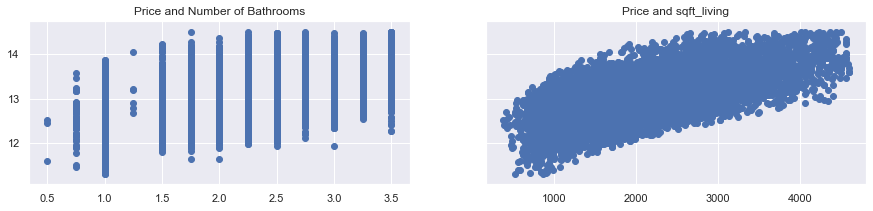

<Figure size 432x288 with 0 Axes>

In [594]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bathrooms'], data_cleaned['log_price'])
ax1.set_title('Price and Number of Bathrooms')
ax2.scatter(data_cleaned['sqft_living'], data_cleaned['log_price'])
ax2.set_title('Price and sqft_living')

plt.show()
plt.savefig('figures/relation_scater_clean_log.png')

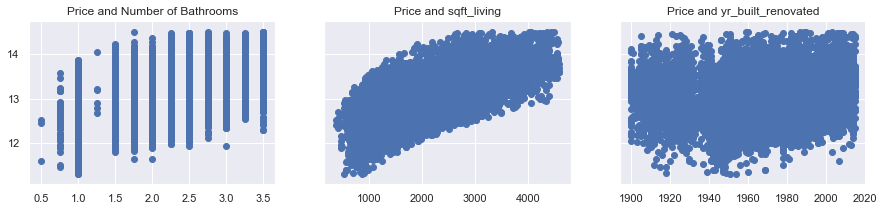

<Figure size 432x288 with 0 Axes>

In [385]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned_new['bathrooms'], data_cleaned_new['log_price'])
ax1.set_title('Price and Number of Bathrooms')
ax2.scatter(data_cleaned_new['sqft_living'], data_cleaned_new['log_price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(data_cleaned_new['yr_built_renovated'], data_cleaned_new['log_price'])
ax3.set_title('Price and yr_built_renovated')

plt.show()
plt.savefig('figures/relation_scater_clean_log_new.png')

In [402]:
#data_cleaned = data_cleaned.drop(['price'], axis=1)
data_cleaned.head()
data_cleaned_new.head()

,price,bathrooms,sqft_living,waterfront,grade,zipcode,yr_built_renovated,log_price
0,538000.00,2.25,2570,0.00,7,98125,1991,13.20
1,604000.00,3.00,1960,0.00,7,98136,1965,13.31
2,510000.00,2.00,1680,0.00,8,98074,1987,13.14
3,257500.00,2.25,1715,0.00,7,98003,1995,12.46
4,229500.00,1.00,1780,0.00,7,98146,1960,12.34


In [573]:
data_cleaned.columns.values

array(['price', 'bathrooms', 'sqft_living', 'waterfront', 'grade', 'lat',
       'long', 'log_price'], dtype=object)

In [574]:
data_cleaned_new.columns.values

array(['price', 'bathrooms', 'sqft_living', 'waterfront', 'grade',
       'zipcode', 'yr_built_renovated', 'log_price'], dtype=object)

In [575]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned_new[['bathrooms', 'sqft_living','yr_built_renovated']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [390]:
vif

,VIF,features
0,20.95,bathrooms
1,15.48,sqft_living
2,11.05,yr_built_renovated


## Create dummy variables

In [576]:
data_cleaned.grade = data_cleaned.grade.apply(str)
data_cleaned.grade.describe()
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [577]:
data_cleaned_new.grade = data_cleaned_new.grade.apply(str)
data_cleaned_new.zipcode = data_cleaned_new.zipcode.apply(str)
data_cleaned_new.grade.describe()
data_with_dummies_new = pd.get_dummies(data_cleaned_new, drop_first=True)

In [578]:
data_with_dummies.head()

,price,bathrooms,sqft_living,waterfront,lat,long,log_price,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,538000.00,2.25,2570,0.00,47.72,-122.32,13.20,0,0,0,0,0,0,1,0,0
1,604000.00,3.00,1960,0.00,47.52,-122.39,13.31,0,0,0,0,0,0,1,0,0
2,510000.00,2.00,1680,0.00,47.62,-122.05,13.14,0,0,0,0,0,0,0,1,0
3,257500.00,2.25,1715,0.00,47.31,-122.33,12.46,0,0,0,0,0,0,1,0,0
4,229500.00,1.00,1780,0.00,47.51,-122.34,12.34,0,0,0,0,0,0,1,0,0


In [579]:
data_with_dummies_new.head()

,price,bathrooms,sqft_living,waterfront,yr_built_renovated,log_price,grade_11,grade_12,grade_3,grade_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,538000.00,2.25,2570,0.00,1991,13.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,604000.00,3.00,1960,0.00,1965,13.31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510000.00,2.00,1680,0.00,1987,13.14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,257500.00,2.25,1715,0.00,1995,12.46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,229500.00,1.00,1780,0.00,1960,12.34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Rearrange a bit

In [580]:
data_with_dummies.columns.values

array(['price', 'bathrooms', 'sqft_living', 'waterfront', 'lat', 'long',
       'log_price', 'grade_11', 'grade_12', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9'],
      dtype=object)

In [581]:
cols = ['log_price','bathrooms', 'sqft_living', 'waterfront',
        'grade_11', 'grade_12', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'lat', 'long']

In [582]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,bathrooms,sqft_living,waterfront,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,lat,long
0,13.20,2.25,2570,0.00,0,0,0,0,0,0,1,0,0,47.72,-122.32
1,13.31,3.00,1960,0.00,0,0,0,0,0,0,1,0,0,47.52,-122.39
2,13.14,2.00,1680,0.00,0,0,0,0,0,0,0,1,0,47.62,-122.05
3,12.46,2.25,1715,0.00,0,0,0,0,0,0,1,0,0,47.31,-122.33
4,12.34,1.00,1780,0.00,0,0,0,0,0,0,1,0,0,47.51,-122.34


In [410]:
data_with_dummies_new.columns.values

array(['price', 'bathrooms', 'sqft_living', 'waterfront',
       'yr_built_renovated', 'log_price', 'grade_11', 'grade_12',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', '

In [488]:
cols_new = ['log_price', 'bathrooms', 'sqft_living', 'waterfront',
       'yr_built_renovated', 'grade_11', 'grade_12',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

data_preprocessed2 = data_with_dummies_new[cols_new]
data_preprocessed2.describe(include ='all')

,log_price,bathrooms,sqft_living,waterfront,yr_built_renovated,grade_11,grade_12,grade_3,grade_4,grade_5,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,...,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00,15212.00
mean,13.01,2.05,1997.48,0.00,1972.91,0.01,0.00,0.00,0.00,0.01,...,0.01,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
std,0.48,0.68,773.07,0.07,28.74,0.10,0.03,0.01,0.03,0.10,...,0.12,0.05,0.14,0.11,0.11,0.11,0.11,0.08,0.11,0.12
min,11.31,0.50,370.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.67,1.50,1410.00,0.00,1954.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,13.00,2.25,1880.00,0.00,1977.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,13.34,2.50,2480.00,0.00,1998.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14.50,3.50,4600.00,1.00,2015.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 6) Predictive Modeling

### Declare the inputs and the targets

In [616]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price','lat','long'],axis=1)
inputs_with_lat = data_preprocessed.drop(['log_price'],axis=1)
x_train_lat, x_test_lat , y_train_lat, y_test_lat = train_test_split(inputs_with_lat, targets, test_size=0.2, random_state=365)

inputs.head()

,bathrooms,sqft_living,waterfront,grade_11,grade_12,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,2.25,2570,0.00,0,0,0,0,0,0,1,0,0
1,3.00,1960,0.00,0,0,0,0,0,0,1,0,0
2,2.00,1680,0.00,0,0,0,0,0,0,0,1,0
3,2.25,1715,0.00,0,0,0,0,0,0,1,0,0
4,1.00,1780,0.00,0,0,0,0,0,0,1,0,0


In [415]:
targets2 = data_preprocessed2['log_price']
inputs2 = data_preprocessed2.drop(['log_price'],axis=1)

### Scale the data

In [584]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [585]:
# this method scales all inputs including the dummie variables, question: should we us a custom scaler to avoid that
inputs_scaled = scaler.transform(inputs)

In [586]:
scaler2 = StandardScaler()
scaler2.fit(inputs2)
inputs2_scaled = scaler2.transform(inputs2)

### Train Test Split

In [587]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [485]:
x_train2, x_test2 , y_train2, y_test2 = train_test_split(inputs2_scaled, targets2, test_size=0.2, random_state=365)

## Create the regression

In [588]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [486]:
reg2 = LinearRegression()
reg2.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2)
#X = poly.fit_transform(X)

In [428]:
y_hat2 = reg2.predict(x_train2)

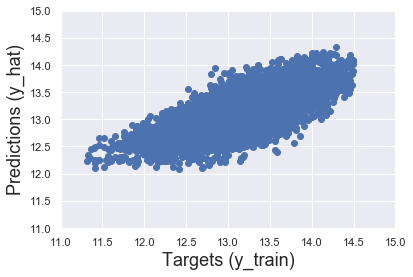

<Figure size 432x288 with 0 Axes>

In [597]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(11,15)
plt.ylim(11,15)
plt.show()
plt.savefig('figures/predictions_targets.png')

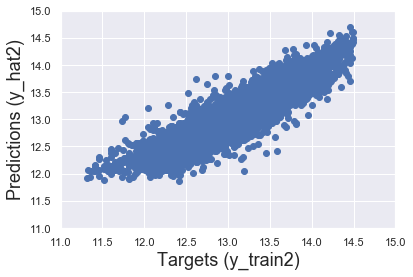

<Figure size 432x288 with 0 Axes>

In [429]:
plt.scatter(y_train2, y_hat2)
plt.xlabel('Targets (y_train2)', size=18)
plt.ylabel('Predictions (y_hat2)', size=18)
plt.xlim(11,15)
plt.ylim(11,15)
plt.show()
plt.savefig('figures/predictions_targets2.png')

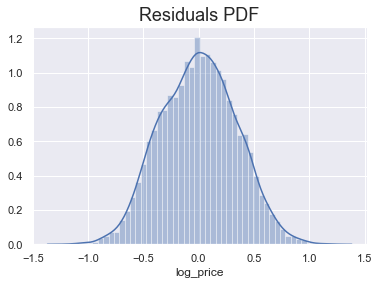

In [590]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)
plt.savefig('figures/residuals.png')

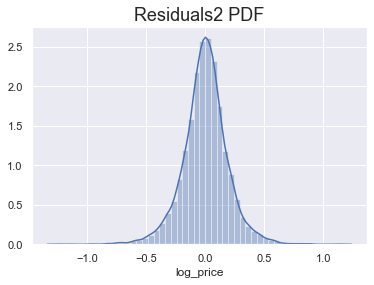

In [430]:
sns.distplot(y_train2 - y_hat2)
plt.title('Residuals2 PDF', size=18)
plt.savefig('figures/residuals2.png')

In [591]:
reg.score(x_train, y_train)

0.49380290238762675

In [432]:
reg2.score(x_train2, y_train2)

0.8419501407970762

## Finding the weights and bias

In [127]:
reg.intercept_

13.013157074288152

In [433]:
reg2.intercept_

13.02182175320665

In [128]:
reg.coef_

array([-1.78634182e-02,  1.56225979e-01,  3.98595739e-02,  4.54646016e-02,
        8.56375084e-03,  6.02673388e-03,  1.11022302e-16, -3.04359509e-02,
       -8.79206823e-02, -1.90965160e-01, -2.32427933e-01, -1.32282359e-01,
       -3.54360741e-02])

In [434]:
reg2.coef_

array([ 2.46533877e-02,  1.88559044e-01,  4.63381407e-02, -3.84544321e-02,
        8.14497514e-03,  2.22668903e-03,  1.29827924e+00, -1.86389379e-02,
       -5.69160134e-02, -1.22103482e-01, -1.46341572e-01, -8.36602634e-02,
       -1.73817600e-02, -7.17457294e-04,  2.63298504e-03,  1.23961245e-01,
        6.68693774e-02,  9.55983390e-02,  5.15345157e-02,  7.70467852e-02,
        2.27983745e-02,  4.22306786e-02,  2.93930389e-02,  3.18050217e-02,
        1.60185672e-02, -2.28738164e-03,  2.99985764e-02,  7.29082813e-02,
        4.68155521e-02,  7.32180024e-02,  7.36040509e-03,  9.06808126e-03,
       -2.19179866e-03,  1.08507863e-01,  8.63400474e-02,  3.19185830e-02,
        4.53664622e-02,  9.56704888e-02,  1.60535864e-02,  3.87914255e-02,
        1.04387066e-01,  8.36261797e-02,  1.58654411e-02,  4.66538309e-02,
        2.38851827e-02,  5.18503525e-02,  5.22991351e-02,  3.13357478e-02,
        5.84870040e-02,  7.68013761e-02,  7.46662449e-02,  4.94443784e-02,
        7.65187946e-03,  

In [129]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,bathrooms,-0.02
1,sqft_living,0.16
2,waterfront,0.04
3,sqft_living15,0.05
4,grade_11,0.01
5,grade_12,0.01
6,grade_3,0.00
7,grade_4,-0.03
8,grade_5,-0.09
9,grade_6,-0.19


In [437]:
reg2.summary = pd.DataFrame(inputs2.columns.values, columns=['Features'])
reg2.summary['Weights'] = reg2.coef_
reg2.summary.head()

,Features,Weights
0,bathrooms,0.02
1,sqft_living,0.19
2,waterfront,0.05
3,yr_built_renovated,-0.04
4,grade_11,0.01


In [130]:
data_cleaned['grade'].unique()

array(['7', '8', '9', '6', '5', '10', '11', '4', '3', '12'], dtype=object)

## Testing

In [190]:
y_hat_test = reg.predict(x_test)
x_test_latlong = x_test_lat[['lat','long']]
x_test_latlong.head()
x_test_latlong['Predictions'] = y_hat_test
y_hat_latlong = x_test_latlong
y_hat_latlong.head()

,lat,long,Predictions
5245,47.58,-122.19,12.57
8008,47.47,-122.35,12.61
7249,47.51,-122.16,12.97
8026,47.57,-122.40,12.73
2705,47.58,-122.41,13.16


In [490]:
y_hat_test2 = reg2.predict(x_test2)

x_test2
#print(np.median(x_test2))
#print(np.mean(x_test2))
#print(np.max(x_test2))
#print(np.min(x_test2))

array([[-1.55250578, -1.36792815, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111],
       [-0.81636969, -0.57884457, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111],
       [ 1.02397052,  0.45601914, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111],
       ...,
       [ 0.28783444,  0.74060666, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111],
       [-1.55250578,  0.41721175, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111],
       [-0.44830165, -0.21664228, -0.0694405 , ..., -0.07885273,
        -0.11600731, -0.11774111]])

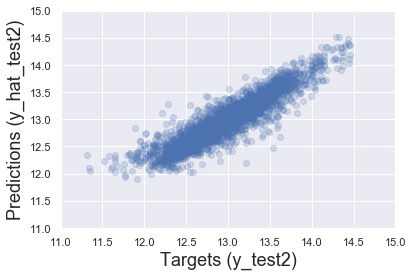

<Figure size 432x288 with 0 Axes>

In [491]:
plt.scatter(y_test2, y_hat_test2, alpha=0.2)
plt.xlabel('Targets (y_test2)', size=18)
plt.ylabel('Predictions (y_hat_test2)', size=18)
plt.xlim(11,15)
plt.ylim(11,15)
plt.show()
plt.savefig('figures/predictions_targets_heat2.png')

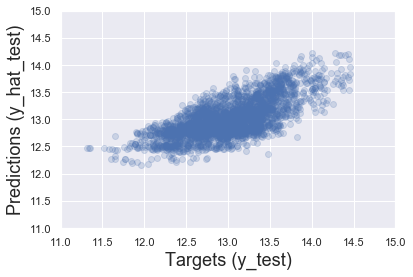

<Figure size 432x288 with 0 Axes>

In [305]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(11,15)
plt.ylim(11,15)
plt.show()
plt.savefig('figures/predictions_targets_heat.png')

In [618]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
print((np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))/data_cleaned["price"].mean())
print("-----------------------")
print(reg.intercept_)
print("-----------------------")
for i in reg.coef_:
        print(i) 

0.34105189067939584
6.77896821864142e-07
-----------------------
13.013173581857908
-----------------------
-0.02028748437023934
0.18125984811662604
0.04068607711555428
0.010602413841815147
0.007300215858666295
-1.6653345369377346e-16
-0.031560879868118896
-0.09239137046485921
-0.20621006947757936
-0.2543925584509165
-0.14603384865064428
-0.03939677533454369


In [139]:
## For lower prices we are closer to the 45% line therefore the prediction is better for lower prices

In [290]:
#df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
#df_pf.head()

y_hat_latlong['Predictions'].reset_index(drop=True)
y_hat_reset_lat = y_hat_latlong['lat'].reset_index(drop=True)
y_hat_reset_long = y_hat_latlong['long'].reset_index(drop=True)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf['lat'] = y_hat_reset_lat
df_pf['long'] = y_hat_reset_long

df_pf.head()

#,y_hat_latlong['lat'], y_hat_latlong['long'] 'lat', 'long'

,Prediction,lat,long
0,289116.75,47.58,-122.19
1,298330.18,47.47,-122.35
2,428788.20,47.51,-122.16
3,337993.81,47.57,-122.40
4,517354.78,47.58,-122.41


In [466]:
df_pf2 = pd.DataFrame(np.exp(y_hat_test2), columns=['Prediction'])
df_pf2.head()
df_pf2.sort_values(by='Prediction').tail()

,Prediction
1300,1801397.16
2989,1934677.52
2598,2003915.63
616,2027144.23
2459,10274595246510159741844059015461015581156787133...


In [500]:
y_test2 = y_test2.reset_index(drop=True)
df_pf2['Target'] = np.exp(y_test2)
df_pf2 = df_pf2.sort_values(by='Prediction')
#df_pf2 = df_pf2.drop(index=2459)
#hier habe ich mich von einem Ausreiser verabschiedet, dieser wird allerdings auch Einfluss auf das Training gehabt haben, daher sollte man einen Weg finden diesen schon aus den Daten zu entfernen
df_pf2.tail()

,Prediction,Target,Residual,Diffrence%
2021,1740735.04,1900000.00,159264.96,8.38
1300,1801397.16,1850000.00,48602.84,2.63
2989,1934677.52,1850000.00,-84677.52,4.58
2598,2003915.63,1660000.00,-343915.63,20.72
616,2027144.23,1610000.00,-417144.23,25.91


In [442]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,lat,long,Target
0,289116.75,47.58,-122.19,600000.00
1,298330.18,47.47,-122.35,313000.00
2,428788.20,47.51,-122.16,426950.00
3,337993.81,47.57,-122.40,400000.00
4,517354.78,47.58,-122.41,589950.00


In [501]:
y_test = y_test.reset_index(drop=True)

In [502]:
df_pf['Target'] = np.exp(y_test)
df_pf.columns.values
cols = ['Prediction','Target','lat', 'long']
df_pf = df_pf[cols]
df_pf.head()

,Prediction,Target,lat,long
0,289116.75,600000.00,47.58,-122.19
1,298330.18,313000.00,47.47,-122.35
2,428788.20,426950.00,47.51,-122.16
3,337993.81,400000.00,47.57,-122.40
4,517354.78,589950.00,47.58,-122.41


In [504]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [604]:
df_pf['Diffrence%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf_neu = df_pf.drop(['lat','long'], axis=1)
df_pf_neu.describe()

,Prediction,Target,Residual,Diffrence%
count,3043.00,3043.00,3043.00,3043.00
mean,471416.66,492691.96,21275.30,29.06
std,185339.39,259633.26,177447.56,24.08
min,189408.81,82000.00,-536430.64,0.02
25%,351568.28,310000.00,-95563.85,11.58
50%,409036.27,435000.00,-4108.20,23.68
75%,534498.08,611553.00,110733.03,40.06
max,1501853.31,1900000.00,1105135.08,219.50


In [495]:
df_pf2['Residual'] = df_pf2['Target'] - df_pf2['Prediction']

In [499]:
df_pf2['Diffrence%'] = np.absolute(df_pf2['Residual']/df_pf2['Target']*100)
df_pf2.describe()

,Prediction,Target,Residual,Diffrence%
count,3042.00,3042.00,3042.00,3042.00
mean,486102.92,492767.80,6664.88,14.65
std,240772.85,259642.23,100141.31,15.26
min,146886.57,82000.00,-429768.82,0.00
25%,314873.16,310000.00,-43833.71,4.84
50%,433943.95,435000.00,1320.27,10.46
75%,584710.52,611726.50,46557.19,19.43
max,2027144.23,1900000.00,639376.08,182.24


In [506]:
df_pf.describe()

,Prediction,Target,lat,long,Residual,Diffrence%
count,3043.00,3043.00,3043.00,3043.00,3043.00,3043.00
mean,471416.66,492691.96,47.55,-122.21,21275.30,29.06
std,185339.39,259633.26,0.14,0.14,177447.56,24.08
min,189408.81,82000.00,47.18,-122.51,-536430.64,0.02
25%,351568.28,310000.00,47.46,-122.33,-95563.85,11.58
50%,409036.27,435000.00,47.56,-122.23,-4108.20,23.68
75%,534498.08,611553.00,47.68,-122.12,110733.03,40.06
max,1501853.31,1900000.00,47.78,-121.36,1105135.08,219.50


In [608]:
df_pf.sort_values(by=['Diffrence%']).tail(3)

,Prediction,Target,lat,long,Residual,Diffrence%
643,260780.18,85000.00,47.38,-122.24,-175780.18,206.80
1271,260147.65,84000.00,47.48,-122.27,-176147.65,209.70
1233,261987.17,82000.00,47.50,-122.34,-179987.17,219.50


In [703]:
df_pf2.sort_values(by=['Diffrence%']).head()

,Prediction,Target,Residual,Diffrence%
125,623008.44,623000.00,-8.44,0.00
188,350046.96,350000.00,-46.96,0.01
978,305040.99,305000.00,-40.99,0.01
727,630109.95,630000.00,-109.95,0.02
2875,304944.68,305000.00,55.32,0.02


In [151]:
#vorallem Häuser die besonders günstig waren
#vielleicht war das Haus in irgendeiner Form kaput?? Lage??
#hier könnte man noch einmal in die Daten gehen um zu schauen, was man als Variable vielleicht nehmene könnte

# 7) Data Visualization

In [ ]:
# wenn sich die Marker komplett ausserhalb des Gebietes befinden würden, könnte man daraus schließen, das auf jeden Fall die Lage dazugenommen werden soll
# man sieht das die Lage auf jeden Fall eine Rolle zu spielen scheint, wir haben dies rudimentär schon mit der Wanterfront untersucht, es scheint aber sinnvoll zu sein die ZipCodes auch in die Gleichung einzuführen 
# darüber hinaus man es sinn eine andere Komponente und zwar das Alter mit in die Gleichung zu nehmen
# hier werde ich eine Variable erstellen die entweder das Datum nimmt in dem es gebaut wurde oder das Datum der renovierung
# die Heatmap am Anfang hat bereits angedeutet das vorallem lat eine Auswirkung auf den Preis haben könnte

In [639]:
df = df_pf.sort_values(by=['Diffrence%'])
df.tail(3)
df_tail = df.tail(2)
df_tail

,Prediction,Target,lat,long,Residual,Diffrence%
1271,260147.65,84000.00,47.48,-122.27,-176147.65,209.70
1233,261987.17,82000.00,47.50,-122.34,-179987.17,219.50


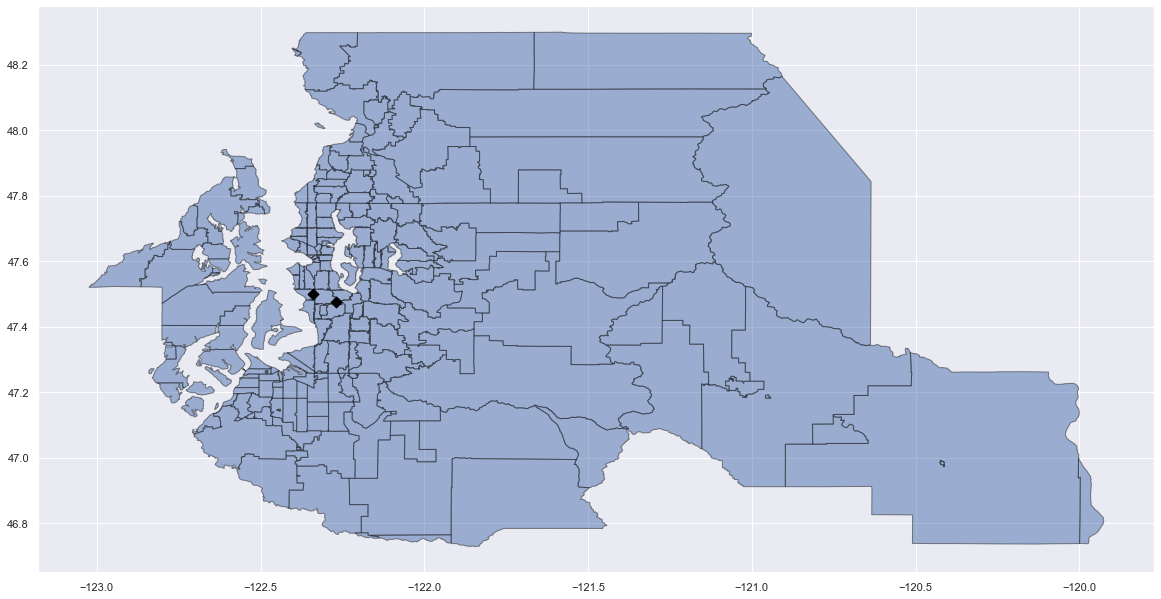

In [657]:
import geopandas as gpd
import descartes

df_plot_2 = gpd.read_file('Zipcodes/Zipcodes.shp')
df_plot_2 = df_plot_2.to_crs(epsg=4326)
ax_2 = df_plot_2.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
df_geo_2 = gpd.GeoDataFrame(df_tail, geometry=gpd.points_from_xy(df_tail.long, df_tail.lat))
df_geo_2.plot(ax=ax_2, color='black', markersize=60, marker='D');
plt.savefig('figures/good_deals.png')
# hier kann man noch die Mega Reichen mit eintragen, damit günstig aber auch sehr nah

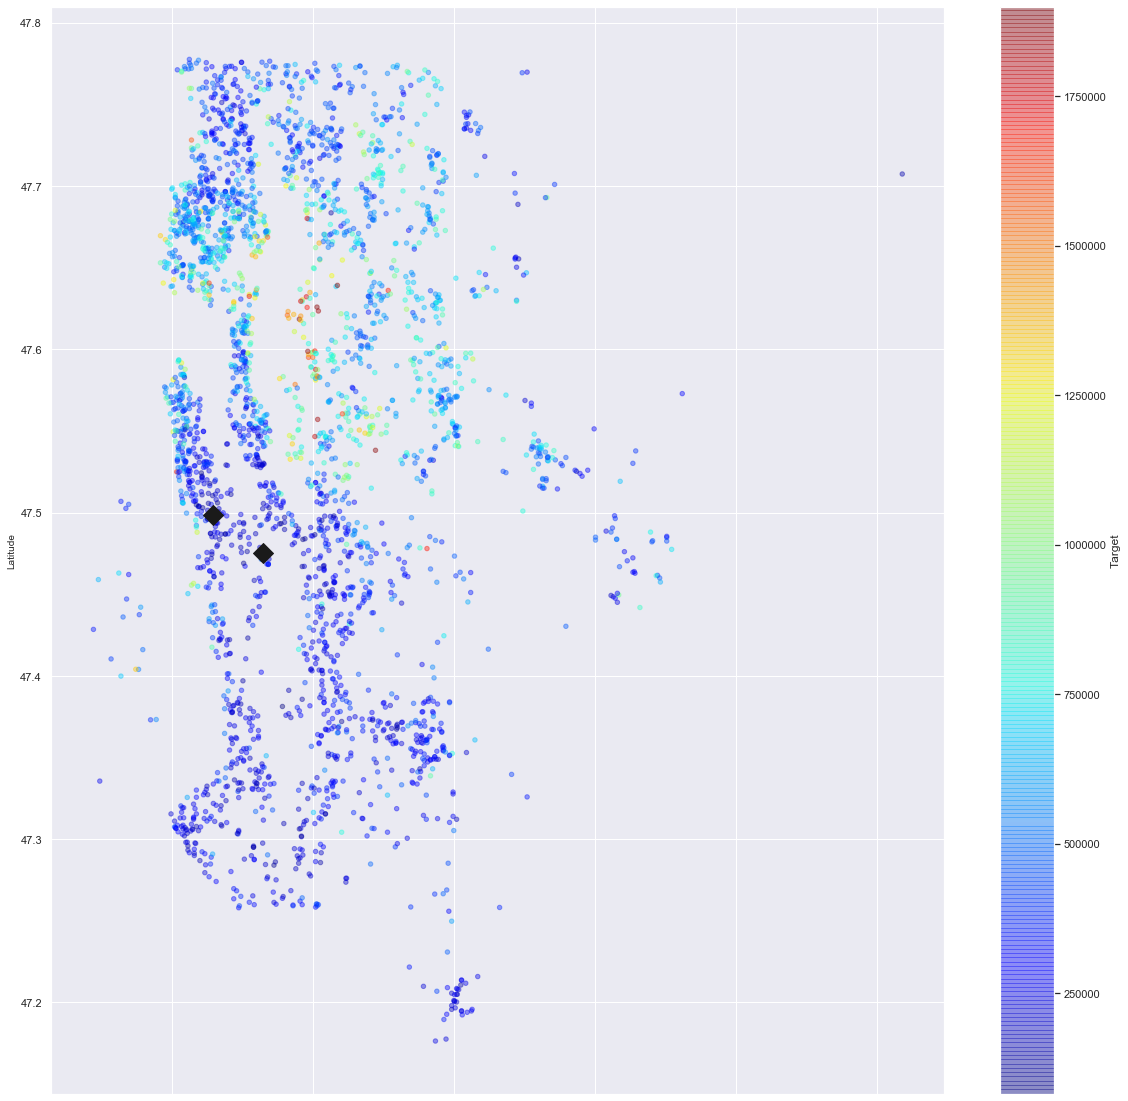

<Figure size 432x288 with 0 Axes>

In [640]:
y = df_tail.lat
x = df_tail.long

df.plot(kind="scatter", x="long", y="lat",c="Target",
             cmap=plt.get_cmap("jet"),colorbar=True,
             alpha=0.4,figsize=(20,20))

plt.scatter(x, y, alpha=1, marker='D', c='k', s=200)


#df.plot(kind="scatter", x="long", y="lat",c="Target",
             #cmap=plt.get_cmap("jet"),colorbar=True,
             #alpha=0.4,figsize=(13, 6),)

#df_tail.plot(kind="scatter", x="long", y="lat",c="Target",
             #alpha=0.4,figsize=(13, 6),)

plt.ylabel("Latitude", fontsize=10)
plt.xlabel("Longitude", fontsize=10)
plt.show()
plt.savefig('figures/influenceoflat.png')

In [658]:
df_tail2 = df_pf2.sort_values(by=['Diffrence%']).tail(3)
print(df_tail2)
raw_data.loc[raw_data['price'] == 84000]
#or [raw_data['price'] == 216650 or [raw_data['price'] == 216650

      Prediction    Target   Residual  Diffrence%
2609   376267.85 145000.00 -231267.85      159.50
1099   589192.28 216650.00 -372542.28      171.96
1233   231438.34  82000.00 -149438.34      182.24


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3763,1523049188,4/30/2015,84000.00,2,1.00,700,20130,1.00,0.00,0.00,...,6,700,0.0,1949,0.00,98168,47.48,-122.27,1490,18630


In [627]:
#y = df_tail2.lat
#x = df_tail2.long

#df2.plot(kind="scatter", x="long", y="lat",c="Target",
#             cmap=plt.get_cmap("jet"),colorbar=True,
#             alpha=0.4,figsize=(20,20))

#plt.scatter(x, y, alpha=1, marker='D', c='k', s=200)


#df.plot(kind="scatter", x="long", y="lat",c="Target",
             #cmap=plt.get_cmap("jet"),colorbar=True,
             #alpha=0.4,figsize=(13, 6),)

#df_tail.plot(kind="scatter", x="long", y="lat",c="Target",
             #alpha=0.4,figsize=(13, 6),)

#plt.ylabel("Latitude", fontsize=10)
#plt.xlabel("Longitude", fontsize=10)
#plt.show()
#plt.savefig('figures/influenceoflat.png')

AttributeError: 'DataFrame' object has no attribute 'lat'

In [291]:
#teilweise lässt sich ein Zusammenhang zwischen Lage und Preis erkennen
#warum sind teilweise häuser so günstig, obwohl sie gut gelegen sind - alter / letzte renovierung?

#condition??

# eine Möglichkeit wäre jetzt in den Testdaten nach den günstigen Häusern zu suchen und weitere Ideen einzuholen, warum sie vielleicht so günstig sind
#es könnte die Chance für ein Schnäppchen sein

In [641]:
raw_data.loc[raw_data['price'] == 84000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3763,1523049188,4/30/2015,84000.00,2,1.00,700,20130,1.00,0.00,0.00,...,6,700,0.0,1949,0.00,98168,47.48,-122.27,1490,18630


In [702]:
raw_data.loc[raw_data['price'] == 227950.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
440,3353401710,9/23/2014,227950.00,3,1.50,1670,8230,1.00,0.00,0.00,...,7,1670,0.0,1954,0.00,98001,47.26,-122.25,2077,4910
10480,739500270,11/13/2014,227950.00,3,1.50,1120,11430,1.00,0.00,0.00,...,7,1120,0.0,1963,0.00,98031,47.41,-122.19,1790,8760


In [ ]:
# was sind die teuersten Zipcodes ()

# was sind die billigsten Zipcodes


In [699]:
rich_people = raw_data.loc[raw_data['price'] >= 3000000]
rich_people.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3225069065,6/24/2014,3080000.00,4,5.00,4550,18641,1.00,1.00,4.00,...,10,2600,1950.0,2002,0.00,98074,47.61,-122.08,4550,19508
656,3760500116,11/20/2014,3070000.00,3,2.50,3930,55867,1.00,1.00,4.00,...,8,2330,1600.0,1957,0.00,98034,47.70,-122.22,2730,26324
1162,1247600105,10/20/2014,5110000.00,5,5.25,8010,45517,2.00,1.00,4.00,...,12,5990,2020.0,1999,0.00,98033,47.68,-122.21,3430,26788
1313,7558700030,4/13/2015,5300000.00,6,6.00,7390,24829,2.00,1.00,nan,...,12,5000,2390.0,1991,0.00,98040,47.56,-122.21,4320,24619
1446,8907500070,4/13/2015,5350000.00,5,5.00,8000,23985,2.00,0.00,4.00,...,12,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750


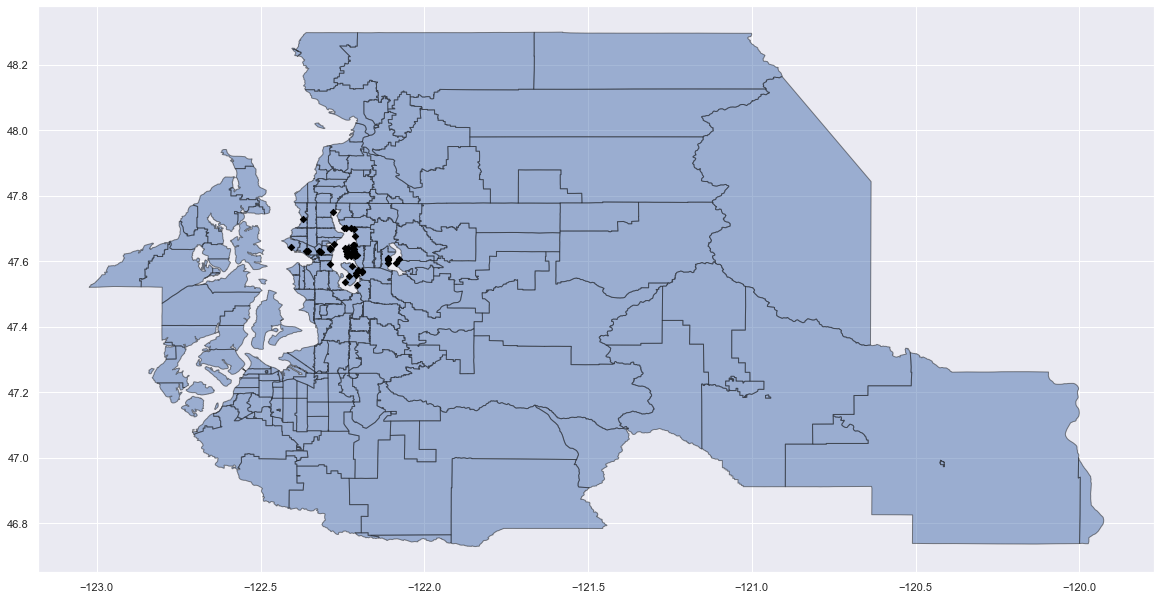

In [566]:
import geopandas as gpd
import descartes

rich_people_plot = gpd.read_file('Zipcodes/Zipcodes.shp')
rich_people_plot = rich_people_plot.to_crs(epsg=4326)
ax = rich_people_plot.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
rich_people_plot_geo = gpd.GeoDataFrame(rich_people, geometry=gpd.points_from_xy(rich_people.long, rich_people.lat))
rich_people_plot_geo.plot(ax=ax, color='black', markersize=20, marker='D');
plt.savefig('figures/rich_people.png')

In [698]:
poor_people = raw_data.loc[raw_data['price'] <= 100000]
poor_people.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,8658300340,5/23/2014,80000.00,1,0.75,430,5050,1.00,nan,0.00,...,4,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500
1216,3751600030,7/17/2014,100000.00,2,1.00,770,17334,1.00,0.00,0.00,...,7,770,0.0,1978,0.00,98001,47.30,-122.27,1480,17334
2139,1623049041,5/8/2014,82500.00,2,1.00,520,22334,1.00,0.00,0.00,...,5,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
3106,1721801591,2/19/2015,89950.00,1,1.00,570,4080,1.00,0.00,0.00,...,5,570,0.0,1942,0.00,98146,47.51,-122.33,890,5100
3318,2724200705,12/12/2014,95000.00,2,1.00,800,8550,1.00,0.00,0.00,...,7,800,0.0,1947,0.00,98198,47.41,-122.29,1490,8550


In [651]:
rich_people.zipcode.unique()

array([98074, 98034, 98033, 98040, 98004, 98008, 98155, 98144, 98039,
       98105, 98109, 98102, 98199, 98112, 98006, 98119, 98075, 98177,
       98056])

In [652]:
poor_people.zipcode.unique()

array([98014, 98001, 98168, 98146, 98198, 98178, 98002, 98166, 98058,
       98055, 98023, 98108, 98032, 98034, 98106, 98092])

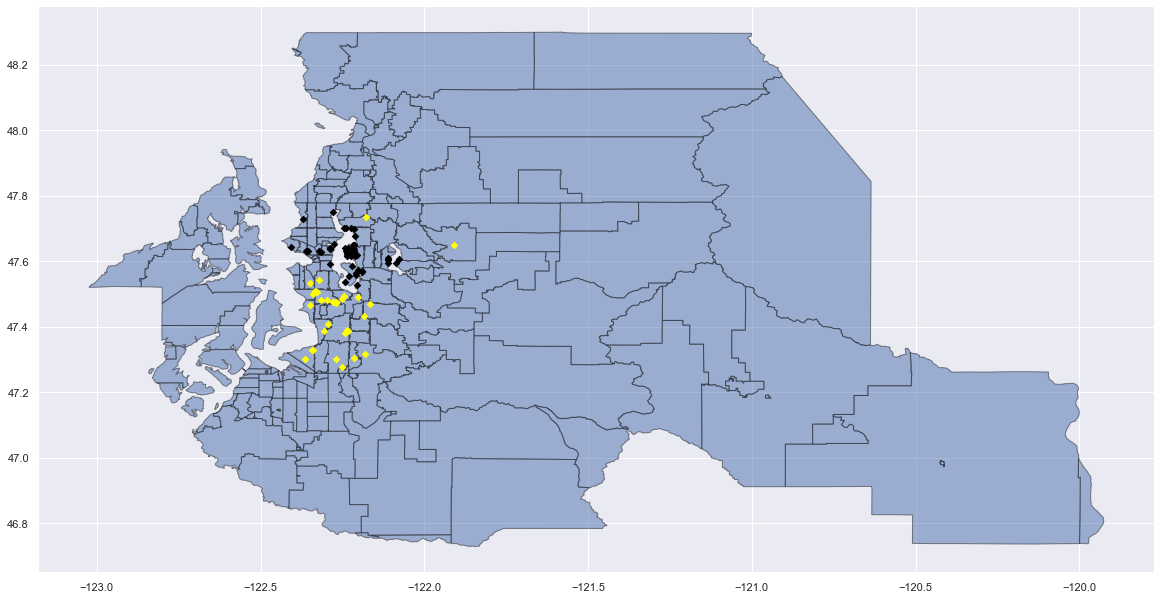

In [567]:
import geopandas as gpd
import descartes

rich_people_plot = gpd.read_file('Zipcodes/Zipcodes.shp')
rich_people_plot = rich_people_plot.to_crs(epsg=4326)
ax = rich_people_plot.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
rich_people_plot_geo = gpd.GeoDataFrame(rich_people, geometry=gpd.points_from_xy(rich_people.long, rich_people.lat))
rich_people_plot_geo.plot(ax=ax, color='black', markersize=20, marker='D');
poor_people_plot_geo = gpd.GeoDataFrame(poor_people, geometry=gpd.points_from_xy(poor_people.long, poor_people.lat))
poor_people_plot_geo.plot(ax=ax, color='yellow', markersize=20, marker='D');
plt.savefig('figures/rich_poor_people.png')

In [659]:
poor_people = raw_data.loc[raw_data['price'] <= 100000]

In [697]:
raw_data.loc[raw_data['zipcode'] == 98146].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8,2414600126,4/15/2015,229500.00,3,1.00,1780,7470,1.00,0.00,0.00,...,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
160,84000105,5/7/2014,255000.00,5,2.25,2060,8632,1.00,0.00,0.00,...,7,1030,1030.0,1962,0.00,98146,47.49,-122.33,1010,11680
217,1909600046,7/3/2014,445838.00,3,2.50,2250,5692,2.00,0.00,0.00,...,8,2250,?,2000,0.00,98146,47.51,-122.38,1320,5390
225,7454001200,6/4/2014,390000.00,3,2.25,1250,7500,1.00,0.00,0.00,...,7,1250,0.0,1942,nan,98146,47.51,-122.37,1280,7392
324,7520000520,9/5/2014,232000.00,2,1.00,1240,12092,1.00,nan,0.00,...,6,960,280.0,1922,1984.00,98146,47.50,-122.35,1820,7460


In [679]:
raw_data.query('zipcode == 98146 or zipcode == 98168').groupby('zipcode').mean()['price']

zipcode
98146   359496.26
98168   240328.37
Name: price, dtype: float64

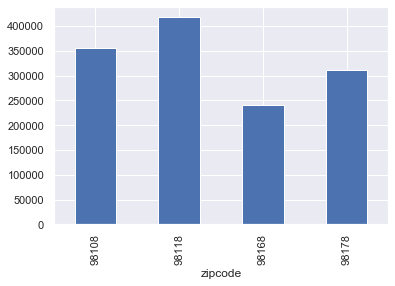

In [695]:
raw_data.query('zipcode == 98168 or zipcode == 98108 or zipcode == 98118 or zipcode == 98178').groupby('zipcode').mean()['price'].plot(kind='bar')

In [696]:
raw_data.groupby('zipcode').mean()['price'].head()

zipcode
98001    281194.87
98002    234284.04
98003    294111.28
98004   1356523.99
98005    810289.70
Name: price, dtype: float64

# 8) Conclusions

* more in the south
* just one bathroom 
* not too young
* small
* definetly not by the water
* choose the right zipcode

Example for the predictive power of the model: 
1.5 bathrooms / year 1963 / 1120 sqft / no waterfront / zipcode 98031
model: 228,127 $ => real price: 239,950 $.

# 9) Future Work

* polynomial regression
* more features (condition, etc.)
* better data cleaning
* detailed analysis of all zipcodes
* better code efficiency
* improvement of map visualization